# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
lat=[]
lng =[]
Max_temp =[]
Humidity =[]
Cloudiness = []
Wind_Speed =[]
Country =[]
date =[]
city_name=[]


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print("Processing data for " + city)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
    except:
        print("city not available")
                        
                     

  
#print(json.dumps(response,indent=4,sort_keys=True))




Processing data for skalistyy
city not available
Processing data for kuche
city not available
Processing data for faanui
Processing data for hithadhoo
Processing data for rosita
Processing data for hasaki
Processing data for crab hill
city not available
Processing data for cape town
Processing data for rikitea
Processing data for ushuaia
Processing data for grand island
Processing data for mar del plata
Processing data for tuktoyaktuk
Processing data for bluff
Processing data for rocha
Processing data for saint-georges
Processing data for klaksvik
Processing data for chiredzi
Processing data for jamestown
Processing data for arraial do cabo
Processing data for esperance
Processing data for busselton
Processing data for boa vista
Processing data for illoqqortoormiut
city not available
Processing data for saint george
Processing data for las palmas
Processing data for tuatapere
Processing data for east london
Processing data for viesca
Processing data for ancona
Processing data for puert

Processing data for faya
Processing data for provideniya
Processing data for marsaxlokk
Processing data for novoyegoryevskoye
city not available
Processing data for attawapiskat
city not available
Processing data for tanjong malim
city not available
Processing data for manono
Processing data for alofi
Processing data for katherine
Processing data for swan river
Processing data for key largo
Processing data for springbok
Processing data for saskylakh
Processing data for marzuq
Processing data for bubaque
Processing data for canico
Processing data for fonte boa
Processing data for krasnoselkup
Processing data for samusu
city not available
Processing data for santa isabel do rio negro
Processing data for bababe
city not available
Processing data for tiquisio
Processing data for bambous virieux
Processing data for cervo
Processing data for hovd
Processing data for spring hill
Processing data for oxford
Processing data for half moon bay
Processing data for umm lajj
Processing data for beloh

Processing data for sinop
Processing data for bilibino
Processing data for patea
Processing data for xifeng
Processing data for port blair
Processing data for mirabad
Processing data for lagoa
Processing data for basi
Processing data for maragogi
Processing data for hay river
Processing data for kjollefjord
Processing data for karaul
city not available
Processing data for atambua
Processing data for orodara
Processing data for sakata
Processing data for galgani
city not available
Processing data for panjakent
Processing data for hami
Processing data for saint-leu
Processing data for kashi
Processing data for toliary
city not available
Processing data for laureles
Processing data for tirumullaivasal
Processing data for severnoye
Processing data for yenotayevka
Processing data for zelenikovo
Processing data for morden
Processing data for surt
Processing data for mago
Processing data for umea
Processing data for bowen
Processing data for college
Processing data for saquena
Processing data

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_dict = {
    "city": city_name,
    "lat": lat,
    "lng": lng,
    "Max_Temp":Max_temp,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":Wind_Speed,
    "Country":Country,
    "date":date   

}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,date
0,Faanui,-16.4833,-151.7500,27.30,75,37,6.26,PF,1619037877
1,Hithadhoo,-0.6000,73.0833,27.99,68,23,2.42,MV,1619037877
2,Rosita,13.9268,-84.4032,33.55,35,88,3.45,NI,1619037877
3,Hasaki,35.7333,140.8333,8.00,93,20,1.03,JP,1619037878
4,Cape Town,-33.9258,18.4232,19.00,77,0,3.60,ZA,1619038277


In [15]:
weather_data.count()

city          563
lat           563
lng           563
Max_Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
date          563
dtype: int64

In [16]:
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [22]:
weather_data.dtypes

city           object
lat           float64
lng           float64
Max_Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
date            int64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
# there is no city where humiity is more than 100 % ion my weather data set

In [18]:
#  Get the indices of cities that have humidity over 100%.
weather_data[weather_data.Humidity > 100]

,city,lat,lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,date


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

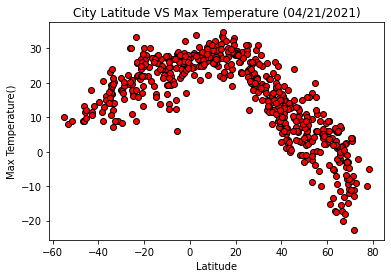

In [27]:

plt.scatter(weather_data["lat"], weather_data["Max_Temp"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude VS Max Temperature (04/21/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature()")
plt.savefig("../Images/LatVsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

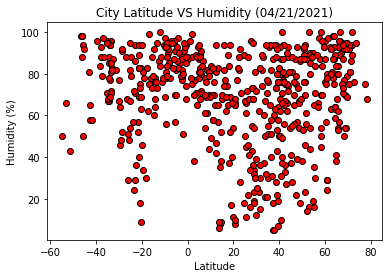

In [32]:
plt.scatter(weather_data["lat"], weather_data["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude VS Humidity (04/21/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/LatVsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

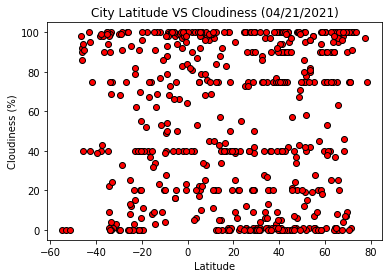

In [33]:
plt.scatter(weather_data["lat"], weather_data["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude VS Cloudiness (04/21/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/LatVsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

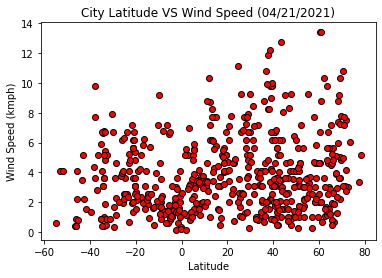

In [35]:
plt.scatter(weather_data["lat"], weather_data["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude VS Wind Speed (04/21/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmph)")
plt.savefig("../Images/LatVsWindSpeed.png")
plt.show()

## Linear Regression

In [51]:
north_hemi = weather_data[weather_data["lat"]>0]
north_hemi.head()

,city,lat,lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,date
2,Rosita,13.9268,-84.4032,33.55,35,88,3.45,NI,1619037877
3,Hasaki,35.7333,140.8333,8.00,93,20,1.03,JP,1619037878
7,Grand Island,40.9250,-98.3420,8.00,31,90,6.69,US,1619037798
9,Tuktoyaktuk,69.4541,-133.0374,-12.00,79,90,10.29,CA,1619037879
12,St. George's,12.0564,-61.7485,29.00,65,20,10.29,GD,1619037880


In [52]:
south_hemi = weather_data[weather_data["lat"]<0]

south_hemi.head()

,city,lat,lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,date
0,Faanui,-16.4833,-151.7500,27.30,75,37,6.26,PF,1619037877
1,Hithadhoo,-0.6000,73.0833,27.99,68,23,2.42,MV,1619037877
4,Cape Town,-33.9258,18.4232,19.00,77,0,3.60,ZA,1619038277
5,Rikitea,-23.1203,-134.9692,25.70,71,15,5.23,PF,1619037878
6,Ushuaia,-54.8000,-68.3000,10.00,50,0,0.60,AR,1619037878


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

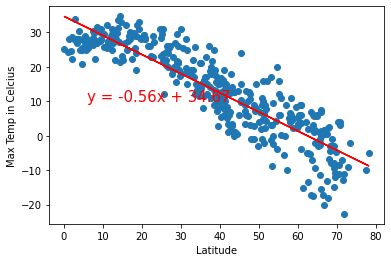

The R-Value is :-0.8889067667633582


In [56]:
x_values = north_hemi['lat']
y_values = north_hemi['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp in Celcius')
plt.show()
print("The R-Value is :" + str(rvalue) )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

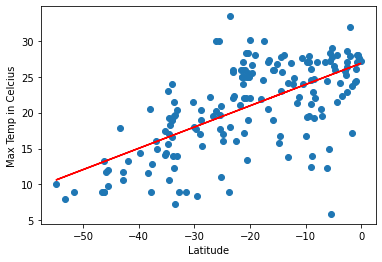

The R-Value is :0.6336530110016978


In [59]:
x_values = south_hemi['lat']
y_values = south_hemi['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp in Celcius')
plt.show()
print("The R-Value is :" + str(rvalue) )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

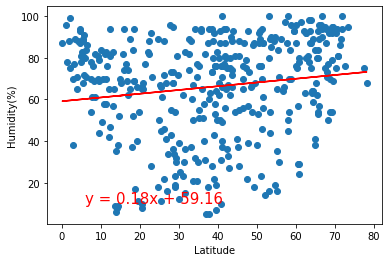

The R-Value is :0.150599844647478


In [62]:
x_values = north_hemi['lat']
y_values = north_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.show()
print("The R-Value is :" + str(rvalue) )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

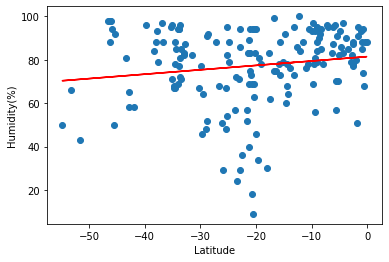

The R-Value is :0.15129288301349994


In [63]:
x_values = south_hemi['lat']
y_values = south_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.show()
print("The R-Value is :" + str(rvalue) )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

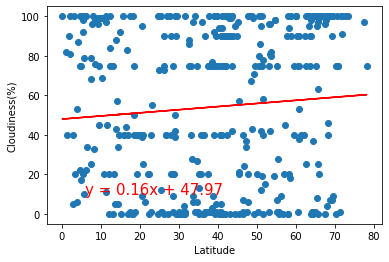

The R-Value is :0.08135093880565915


In [64]:
x_values = north_hemi['lat']
y_values = north_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()
print("The R-Value is :" + str(rvalue) )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

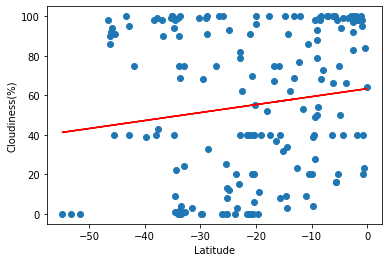

The R-Value is :0.1425710409980747


In [65]:
x_values = south_hemi['lat']
y_values = south_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()
print("The R-Value is :" + str(rvalue) )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

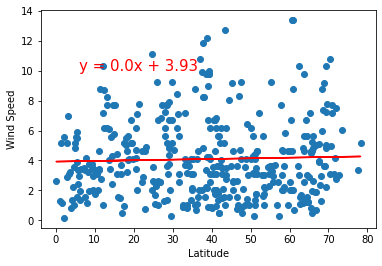

The R-Value is :0.033826619188785066


In [66]:
x_values = north_hemi['lat']
y_values = north_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print("The R-Value is :" + str(rvalue) )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

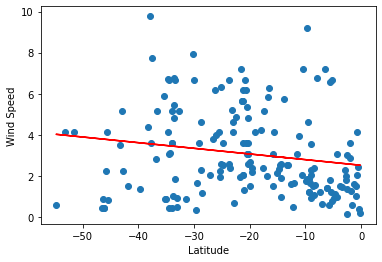

The R-Value is :-0.17619590932911064


In [68]:
x_values = south_hemi['lat']
y_values = south_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print("The R-Value is :" + str(rvalue) )